In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn_gbmi import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from EDA_function import EDA

In [71]:
data,df_info = EDA('train.csv')
target = data['target']
data = data.drop('target',axis = 1)
data

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,0.0,0,0.0,0,0,0,0,0,2200000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,0.0,0,0.0,0,0,0,0,0,2000000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,ff85154c8,0.0,0,0.0,0,0,0,0,0,70000.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4455,ffb6b3f4f,0.0,0,0.0,0,0,0,0,0,375000.0,...,0.0,0.0,80000.0,0,0,0,0,0,0,0
4456,ffcf61eb6,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4457,ffea67e98,0.0,0,0.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [219]:
target.sample(n=rows, random_state=1)

2012     1300000.0
3205    20000000.0
2359      150000.0
4387      400000.0
3116      770000.0
           ...    
829       452000.0
3363     2500000.0
456      2000000.0
2379     3550000.0
3480      400000.0
Name: target, Length: 891, dtype: float64

In [72]:
df = data.set_index('ID')
all_zero_l = df_info.columns[np.where(df_info.loc['zero_rate']>=.95)]
df = df.drop(all_zero_l,axis=1)
df

,20aa07010,4681de4fd,b8a716ebf,0d866c3d7,bd8f989f1,22ed6dba3,92b13ebba,87ffda550,822e49b95,d04e16aed,...,ea5ed6ff7,b1bb8eac3,c24ea6548,cdfc2b069,6b119d8ce,8d8bffbae,9437d8b64,5831f4c76,3ecc09859,8675bec0b
ID,,,,,,,,,,,,,,,,,,,,,
000d6aaf2,0.0,0,0.0,0.0,0.0,0.0,0.0,1300000.0,0.0,0.0,...,0.0,0.0,0.0,1200000.0,0.0,0.0,0,0.0,0.0,0.0
000fbd867,2200000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
0027d6b71,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
0028cbf45,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
002a68644,2000000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff85154c8,70000.0,6000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
ffb6b3f4f,375000.0,0,0.0,0.0,0.0,0.0,0.0,0.0,375000.0,0.0,...,0.0,0.0,0.0,80000.0,0.0,0.0,0,375000.0,0.0,80000.0
ffcf61eb6,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,4291000.0,0.0,0.0


In [74]:
max(df_info.loc['zero_rate',df.columns])

0.9499887867234806

In [115]:
from pprint import pprint
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 60, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [0, 22, 44, 66, 88, 111, 133, 155, 177, 200]}


In [196]:
from math import sqrt
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    test_results = (model.score(X_test, y_test),sqrt(mean_squared_error(predictions, y_test)))
   
    print('Model Performance')
    print('R2 Score: {:0.2f}% degrees.'.format(test_results[0]))
    print('RMSE = {:0.4f}'.format(test_results[1]))
    return test_results

In [116]:
def random_grid(df,target,test_fraction=0.2,RANDOM_SEED= 137):
    
    X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=test_fraction, random_state=RANDOM_SEED)
    #n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
    train_results = {}
    test_results = {}

    rf_default = RandomForestRegressor()
    rf_random = RandomizedSearchCV(estimator = rf_default, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=2, random_state=RANDOM_SEED, n_jobs = -1,return_train_score=True)
    rf_random.fit(X_train, y_train)
    return rf_random

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 16.2min finished


00:16:14.14


In [129]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 110, 120],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'n_estimators': [100, 110, 120]
}

def grid_search(df,target,test_fraction=0.2,RANDOM_SEED= 137,param_grid):
    # Create a base model
    rf_grid = RandomForestRegressor(random_state = RANDOM_SEED)

    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                              cv = 5, n_jobs = -1, verbose = 2, return_train_score=True)
    grid_search.fit(X_train, y_train)
    return grid_search

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   33.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=137,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': 

In [130]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 120}

In [210]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train,y_train)
base_result = evaluate(base_model, X_test, y_test)


best_random = rf_random.best_estimator_
random_result = evaluate(best_random, X_test, y_test)

best_grid = grid_search.best_estimator_
grid_result = evaluate(best_grid, X_test, y_test)

Model Performance
R2 Score: 0.17% degrees.
RMSE = 7557508.9725


ValueError: Number of features of the model must match the input. Model n_features is 997 and input n_features is 285 

In [160]:
def plot_results(model, param = 'n_estimators', name = 'Num Trees'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    #plt.ylim(ymin = -10, ymax = 0)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Neg Mean Absolute Error')
    plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    #plt.ylim(ymin = 0.0, ymax = 2.0)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    
    plt.tight_layout(pad = 4)

In [166]:
tree_grid = {'n_estimators': [int(x) for x in np.linspace(1, 150, 20)]}

# Create the grid search model and fit to the training data
tree_grid_search = GridSearchCV(best_grid, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 5,
                                    xscoring = 'neg_mean_absolute_error',return_train_score=True)
tree_grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   44.8s finished


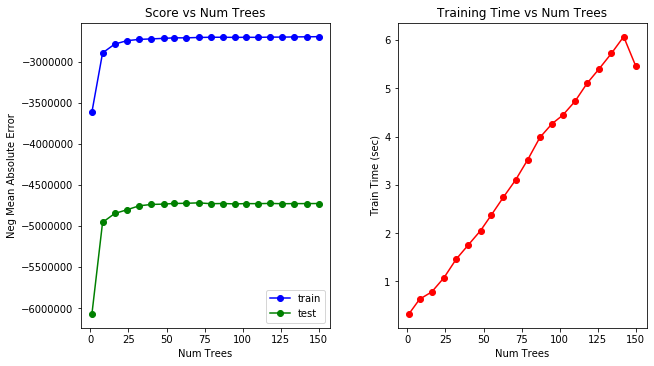

In [167]:
plot_results(tree_grid_search)

In [204]:
grid_search.best_params_
best_model = RandomForestRegressor(bootstrap = True, max_depth = 120, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 120, random_state = 42)
best_model.fit(X_train,y_train)
best_result = evaluate(best_model, X_test, y_test)

Model Performance
R2 Score: 0.29% degrees.
RMSE = 6978049.0355


In [207]:
def feature_sel(model):
    sel = SelectFromModel(model)
    sel.fit(X_train, y_train)
    selected_feat= X_train.columns[(sel.get_support())]
    #len(selected_feat)
    print(selected_feat)
    return selected_feat
features = feature_sel(best_model)

Index(['20aa07010', '87ffda550', '963a49cdc', 'ad207f7bb', 'e078302ef',
       '1184df5c2', '6c0e0801a', '26fc93eb7', '0572565c2', '66ace2992',
       'fb49e4212', '6619d81fc', '6eef030c1', 'fc99f9426', 'aa164b93b',
       '64e483341', '1c71183bb', 'edc84139a', 'bb1113dbb', '174edf08a',
       '1db387535', 'b43a7cfd5', '024c577b9', 'dd84674d0', '9c42bff81',
       'd428161d9', '2ec5b290f', '5f341a818', '5a1589f1a', 'cd24eae8a',
       '0ff32eb98', '58e056e12', '241f0f867', '1931ccfdd', '83635fb67',
       '5bc7ab64f', '58e2e02e6', '1fe5d56b9', '678b3f377', '0dc4d6c7d',
       '9fd594eec', 'fb387ea33', 'fb0f5dbfe', 'd5fa73ead', '91f701ba2',
       '8e4d0fe45', '703885424', 'ba4ceabc5', '348aedc21', '2e103d632',
       '4824c1e90', 'ced6a7e91', '939f628a7', 'c928b4b74', '122c135ed',
       'cbbc9c431', 'eeb9cd3aa', '324921c7b', 'e1e8947d8', '13bdd610a',
       '96b6bd42b', '58232a6fb', '491b9ee45', 'c976a87ad', 'd6bb78916',
       'c10f31664', '70feb1494', 'adb64ff71', '73687e512', '50e4

In [208]:
len(features)

86

Loading and EDA


KeyboardInterrupt: 